In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score, f1_score

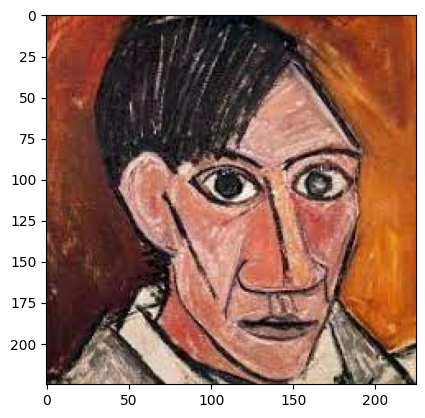

In [2]:
img = cv2.cvtColor(cv2.imread("../data/Picasso.jpeg"), cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)
plt.show()

In [3]:
def objective_function(vec,out, img):
    # blank mask for drawing the shapes
    shapes = np.zeros_like(img, np.uint8)
    t = out.copy()
    # draw circle
    vec[2] = np.abs(vec[2])
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    t[mask] = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)[mask]

    # plt.imshow(t)
    # plt.show()

    #bt = t[: ,: ,0]
    #gt = t[: ,: ,1]
    #rt = t[: ,: ,2]
    #bImg = img[:,:,0]
    #gImg = img[:,:,1]
    #rImg= img[:,:,2]
    # print("(",vec[3],vec[4],vec[5],")")
    return np.sum(np.abs(np.subtract(img,t))) 

    #b  = f1_score(bImg, bt, average='micro')
    #g =  f1_score(gImg, gt, average='micro')
    #r =  f1_score(rImg, rt, average='micro')
    #return np.average((r, g, b)) 
    
out = np.zeros_like(img)
objective_function([100,90, 8, 0,0,255,0.3], out, img) #X,Y,r,R,G,B,alpha

14756606

In [4]:
def draw_circle(vec, out, print = False):
    shapes = np.zeros_like(out, np.uint8)

    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    mask = shapes.astype(bool)
    out[mask] = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)[mask]

    if print:
        plt.imshow(out)
        plt.show()

In [5]:
w,h,c = img.shape

bounds = [
    [0,w],# x
    [0,h], # y
    [5, (w + h)//4], # radius
    [0,255], # R
    [0,255], # G
    [0,255], # B
    [0.6,1], # alpha
]

nIter = 100

# Our Differential Evolution

In [6]:
from differential_evolution import differential_evolution

0 {'P': array([ 9.17057017e+02,  6.55994879e+02,  9.88823654e+02,  1.47166531e+02,
        5.72660864e+01, -4.78275235e+04,  9.63039761e-01]), 'nIt': 800, 'fun': 11629856, 'nFev': 60075}


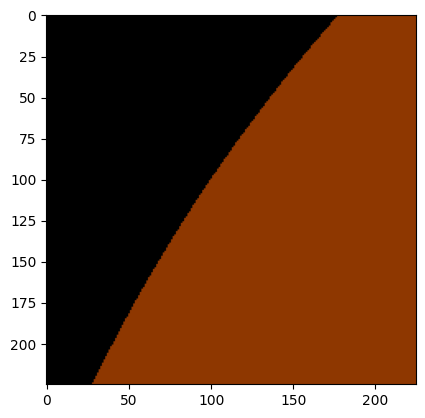

In [7]:
out = np.zeros_like(img)
for i in range(nIter):
    r = differential_evolution(objective_function, bounds, args = (out, img), popSize=75, cR = 0.4, nGen = 800) #The smaller cR is, it takes less risks
    if i % (nIter // np.min((nIter, 5))): 
        draw_circle(r["P"], out)
    else:
        print(i, r)
        draw_circle(r["P"], out, True)
plt.imshow(out)

# Scipy Differential Evolution

In [ ]:
from scipy.optimize import differential_evolution

In [ ]:
out = np.zeros_like(img)
for i in range(nIter):
    res = differential_evolution(objective_function, bounds, args=(out,img), popsize= 100)
    # plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    # plt.show()
    if i % (nIter // np.min((nIter, 5))): draw_circle(res.x, out)
    else:
        draw_circle(res.x, out, True)
        print(i, res)
plt.imshow(out)

# Project

## Recommendation

Work along *scipy*. The idea is to make the project behave as scipy does.

Start with something small and easy. With few details and an image of 200 x 200 approx.

## Individual

The individual is recommended to have:

- **x** - x coordinate value of the circle.

- **y** - y coordinate value of the circle.

- **r** - Radius of the circle, recommended value is (3 or something like that to half the image size).

- **Colors** - RGBA

    - Alpha is optional.

## How it works

This algorithm has to execute itself as many times as circles the image has.

Each execution will add a new circle that minimizes the difference between the image we're building and the target one.